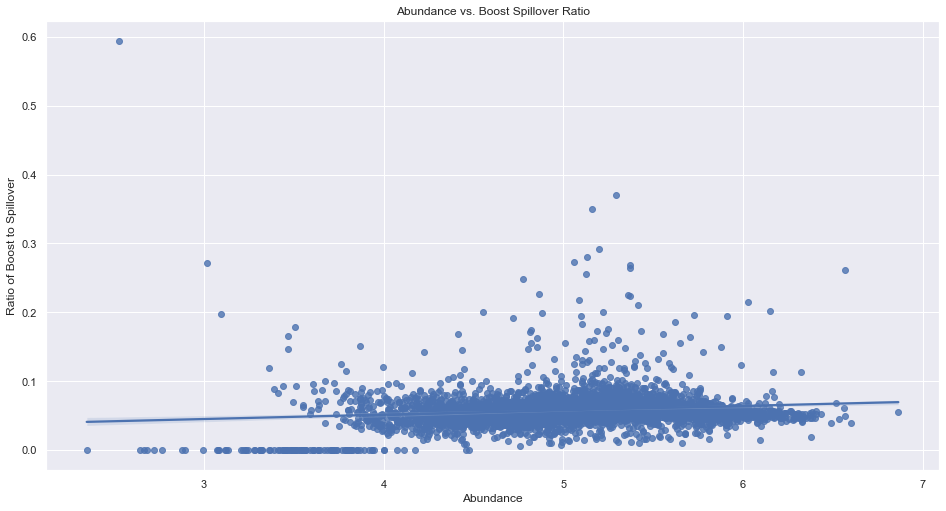

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

psm_df = pd.read_csv('psm.TSV', delimiter = "\t")
# prot_df = prot_df.drop(['Entry Name', 'Gene', 'Length', 'Organism', 'Protein Description', 'Protein Existence', 'Protein Probability', 'Top Peptide Probability',
#                        'Total Peptides', 'Unique Peptides', 'Razor Peptides', 'Total Spectral Count', 'Unique Spectral Count',
#                        'Razor Spectral Count', 'Total Intensity', 'Unique Intensity', 'Razor Intensity', 'Razor Assigned Modifications',
#                        'Razor Observed Modifications', 'Indistinguishable Proteins'], axis=1)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                               'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                               'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

# Plot Ratio vs 126 Abundance (Smaller abundances should have more variance, larger abundances should be more consistent(and smaller))

psm_df['Boost_Spillover'] = psm_df['127C']/psm_df['126']

psm_df

# maxRatio = psm_df[['Boost_Spillover']].max()
# minRatio = psm_df[['Boost_Spillover']].min()
# print("Highest Spillover:")
# print(maxRatio)
# print("Lowest Spillover:")
# print(minRatio)

psm_df[["Boost_Spillover"]].describe()

plt.figure(figsize=(16, 8.27))

sns.set(style="darkgrid")

psm_df["Boost_logged"] = psm_df["126"].apply(np.log10) # In the future, log the axis rather than the actual data

plot = sns.regplot(data=psm_df, x="Boost_logged", y="Boost_Spillover") #Fix these numbers


plot.set(xlabel='Abundance', ylabel='Ratio of Boost to Spillover', 
         title='Abundance vs. Boost Spillover Ratio')
plt.show()